# Using a Pre-Trained Conv-net

Lets have plots appear inline:

In [1]:
%matplotlib inline

We're going to need `numpy`

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pretrained_vgg_models
import theano
import lasagne
import skimage.transform
from lasagne.utils import floatX


EVIL HACK: Disable cuDNN check


DEBUG: nvcc STDOUT mod.cu
   Creating library D:/temp/theano/compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.11-64/tmpmvn3wf/265abc51f7c376c224983485238ff1a5.lib and object D:/temp/theano/compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.11-64/tmpmvn3wf/265abc51f7c376c224983485238ff1a5.exp

Using gpu device 0: GeForce GTX 970 (CNMeM is enabled with initial size: 25.0% of memory, CuDNN 4007)
d:\packages\theano\theano\tensor\signal\downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
IMAGE_PATH = r'D:\Pictures\Serbia 2011-08\P8131065.JPG'
img = plt.imread(IMAGE_PATH)[1000:1800,1000:2000]

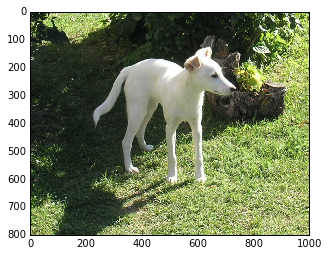

In [4]:
plt.imshow(img)
plt.show()

In [5]:
vgg19_model = pretrained_vgg_models.VGG19Model.load()

In [6]:
in_var = theano.tensor.tensor4('x')
prob = lasagne.layers.get_output(vgg19_model.network['prob'], in_var, deterministic=True)
prob_f = theano.function([in_var], prob)

In [8]:
raw_img, img_for_vgg = vgg19_model.prepare_image(img, 224)

In [9]:
p = prob_f(img_for_vgg)
print p.shape

(1L, 1000L)


In [11]:
pred_cls = np.argmax(p, axis=1)
print('Predicted class index {} with probability {:.2f}%, named "{}"'.format(
    pred_cls[0], p[0, pred_cls[0]]*100.0, vgg19_model.class_names[pred_cls[0]]))

Predicted class index 173 with probability 25.12%, named "Ibizan hound, Ibizan Podenco"
